In [1]:
import os 

In [2]:
#How many photos are there .
for folder in os.listdir('D:\\datasets\\Flowers\\flower_images') :
    path = f"D:\\datasets\\Flowers\\flower_images\\{folder}"
    print(f'number of photos in {folder} folder is : {len(os.listdir(path))}\n---------------------------------------')

number of photos in Lilly folder is : 1000
---------------------------------------
number of photos in Lotus folder is : 1000
---------------------------------------
number of photos in Orchid folder is : 1000
---------------------------------------
number of photos in Sunflower folder is : 1000
---------------------------------------
number of photos in Tulip folder is : 1000
---------------------------------------


In [3]:
#Making base floders .
def Make_paths(path)->None :
    '''function docstring'''
    os.mkdir(f'{path}\\ready_to_gen')
    os.mkdir(f'{path}\\ready_to_gen\\train')
    os.mkdir(f'{path}\\ready_to_gen\\valid')
    for folder in os.listdir(path) :
        if folder == 'ready_to_gen' :
            continue
        os.mkdir(f'{path}\\ready_to_gen\\train\\{folder}')
        os.mkdir(f'{path}\\ready_to_gen\\valid\\{folder}')
Make_paths('D:\\datasets\\Flowers\\flower_images')

In [4]:
#Splitting data to training and validation .
from shutil import copyfile
from random  import sample
def Split_data(path,split_size)->None :
    '''function docstring'''
    size = (split_size * 1000) // 100
    for folder in os.listdir(path) :
        if folder == 'ready_to_gen' :
            continue
        selected_pics = sample(os.listdir(f'{path}\\{folder}'),size)
        for pic in os.listdir(f'{path}\\{folder}') :
            if pic in selected_pics :
                copyfile(f'{path}\\{folder}\\{pic}',f'{path}\\ready_to_gen\\train\\{folder}\\{pic}')
            else :
                copyfile(f'{path}\\{folder}\\{pic}',f'{path}\\ready_to_gen\\valid\\{folder}\\{pic}')
Split_data('D:\\datasets\\Flowers\\flower_images',90)

In [5]:
#Getting instance of generator using data augmetion .
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1/255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
valid_gen = ImageDataGenerator(rescale=1/255)

In [6]:
#Generating data .
ready_train = train_gen.flow_from_directory("D:\\datasets\\Flowers\\flower_images\\ready_to_gen\\train",target_size=(150,150),batch_size=45)
ready_valid = train_gen.flow_from_directory("D:\\datasets\\Flowers\\flower_images\\ready_to_gen\\valid",target_size=(150,150),batch_size=10)

Found 4500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [7]:
#Creating a model using InceptionV3 pre trained model .
from tensorflow.keras import layers , Model
from tensorflow.keras.applications import InceptionV3
def Create_model() :
    pre_trained_model = InceptionV3(include_top=False,input_shape=(150,150,3))
    for layer in pre_trained_model.layers :
        layer.trainable = False
    last_layer = pre_trained_model.get_layer('mixed7')
    last_out = last_layer.output
    x = layers.Flatten()(last_out)
    x = layers.Dense(512,activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(5,activation='softmax')(x)
    model = Model(pre_trained_model.input,x)
    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model
try :
    Create_model()
    print('model has created')
except :
    print('something wrong when running the function')

model has created


In [8]:
history = Create_model().fit(ready_train,epochs=35,validation_data=ready_valid)

Epoch 1/35
100/100 [==============================] - 99s 968ms/step - loss: 2.0219 - accuracy: 0.6020 - val_loss: 0.6135 - val_accuracy: 0.7900
Epoch 2/35
100/100 [==============================] - 77s 768ms/step - loss: 0.6971 - accuracy: 0.7449 - val_loss: 0.4908 - val_accuracy: 0.8460
Epoch 3/35
100/100 [==============================] - 77s 770ms/step - loss: 0.5809 - accuracy: 0.7938 - val_loss: 0.6132 - val_accuracy: 0.7680
Epoch 4/35
100/100 [==============================] - 78s 776ms/step - loss: 0.5417 - accuracy: 0.8029 - val_loss: 0.4747 - val_accuracy: 0.8380
Epoch 5/35
100/100 [==============================] - 77s 772ms/step - loss: 0.4766 - accuracy: 0.8227 - val_loss: 0.3676 - val_accuracy: 0.8600
Epoch 6/35
100/100 [==============================] - 77s 767ms/step - loss: 0.4548 - accuracy: 0.8387 - val_loss: 0.3982 - val_accuracy: 0.8680
Epoch 7/35
100/100 [==============================] - 74s 741ms/step - loss: 0.4080 - accuracy: 0.8489 - val_loss: 0.3852 - val_ac

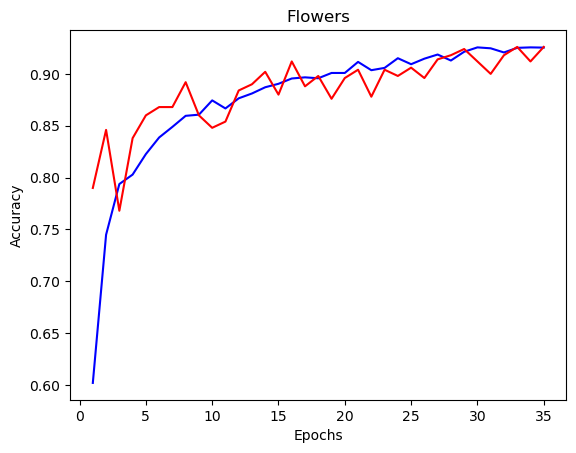

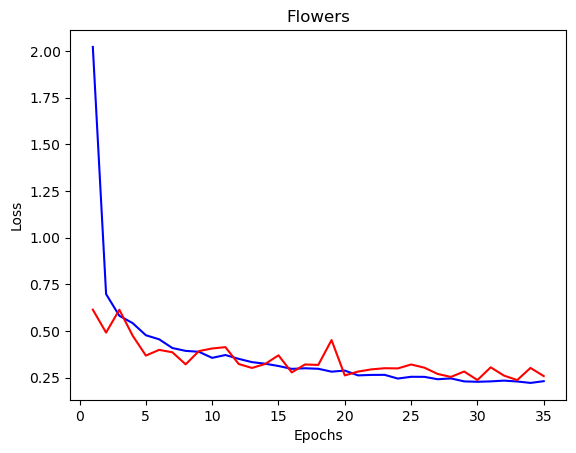

In [9]:
#Visualizing model performance
import matplotlib.pyplot as plt
epoch = range(1,36)
results = history.history
plt.plot(epoch,results['accuracy'],'blue')
plt.plot(epoch,results['val_accuracy'],'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Flowers')
plt.show()
plt.plot(epoch,results['loss'],'blue')
plt.plot(epoch,results['val_loss'],'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Flowers')
plt.show()